In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [3]:
Y_train

array([[ 0.81318727],
       [-1.60549572],
       [-0.13121225],
       ..., 
       [ 1.25649771],
       [-0.31587678],
       [-0.35094738]])

In [4]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

 # Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.443633767129

Parameter estimates for the model with many features:
[  0.00000000e+00  -3.89351238e-01   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -2.77688887e-04
  -7.09158792e-07   3.48711577e+00]


In [5]:
print(lass.score(X_test, Y_test))
# print(lassBig.score(X_test2, Y_test))

0.445532251512


# Assignment
The  λ  for lasso can vary between 0 (no penalty, acts like OLS) and infinity. If  λ  is too large, all parameters will be set to zero.

Create a plot below of how  R2  varies across different values of  λ  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same  R2  for a given lambda value?

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0,0.5,'R Squared')

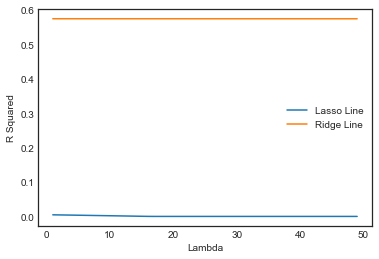

In [6]:
lass1 = linear_model.Lasso(alpha=1, fit_intercept=False)
lass1.fit(X_train2, Y_train)

ridge1 = linear_model.Ridge(alpha=1, fit_intercept=False)
ridge1.fit(X_train2, Y_train)

lasso_coordinates = np.array([1,lass1.score(X_train2,Y_train)])
ridge_coordinates = np.array([1,ridge1.score(X_train2,Y_train)])

for lamb_da in range(2,50):
    
    lass = linear_model.Lasso(alpha=lamb_da, fit_intercept=False)
    lass.fit(X_train2, Y_train)
    
    ridge = linear_model.Ridge(alpha=lamb_da, fit_intercept=False)
    ridge.fit(X_train2, Y_train)
    
    add_array = np.array([lamb_da,lass.score(X_train2,Y_train)])
    lasso_coordinates = np.vstack((lasso_coordinates,add_array))
               
    add_array = np.array([lamb_da,ridge.score(X_train2,Y_train)])
    ridge_coordinates = np.vstack((ridge_coordinates,add_array))
    
Lasso_Coordinates = pd.DataFrame(lasso_coordinates,columns=['lambda'] + ['r_squared'])
Ridge_Coordinates = pd.DataFrame(ridge_coordinates,columns=['lambda'] + ['r_squared'])    

Line1, = plt.plot(Lasso_Coordinates['lambda'],Lasso_Coordinates['r_squared'],label='Lasso Line')
Line2, = plt.plot(Ridge_Coordinates['lambda'],Ridge_Coordinates['r_squared'], label='Ridge Line')

plt.legend(handles=[Line1, Line2])

plt.xlabel('Lambda')
plt.ylabel('R Squared')

In [7]:
Lasso_Coordinates.head()

,lambda,r_squared
0,1.0,0.004630
1,2.0,0.004340
2,3.0,0.004049
3,4.0,0.003755
4,5.0,0.003460


In [8]:
Ridge_Coordinates.head()

,lambda,r_squared
0,1.0,0.573969
1,2.0,0.573964
2,3.0,0.573960
3,4.0,0.573957
4,5.0,0.573955
